# Задание
"Написать с нуля алгоритм k-means без использования библиотек (но можно пользоваться библиотеками, не связанными с самим алгоритмом - отрисовки, подсчетов и т.д.). Пошагово:
1. Найти оптимальное количество кластеров по формулам. И только для этого оптимального значения выводить рисунки.
2. Рисунки выводятся на каждый шаг – сдвиг центроидов. Сколько шагов, столько рисунков (можно в виде gif). Точки из разных кластеров разными цветами.
3. Точки задаются случайным образом на плоскости.
4. Центроиды образуют правильную вписанную в окружность фигуру.
5.  Каждый шаг алгоритма – вывод графическми (см. п.2)."


# Решение


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

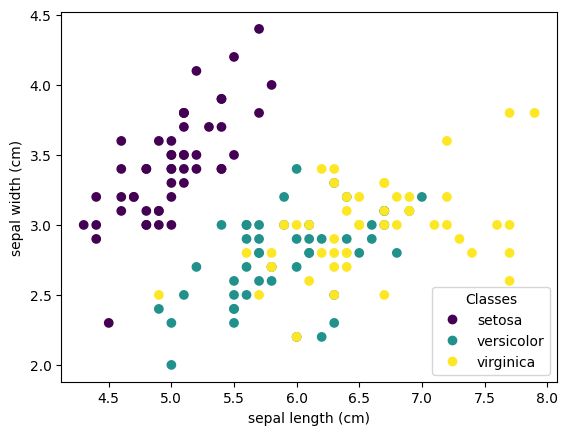

In [3]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [4]:
data = iris.data[:,:2]
data.shape

(150, 2)

In [5]:
a = np.array([[1, 2, 3], [3, 4, 5], [5, 6, 7]])
b = np.array([[1, 2, 3], [3, 4, 5], [5, 6, 7]])
np.linalg.norm(a-b, axis=-1)

array([0., 0., 0.])

In [6]:
from IPython.core.interactiveshell import dis
def generate_regular_polygon_vertices(point, r, k):
    degree_range = 360//k + 1
    start_angle_degr = np.random.randint(degree_range)
    start_angle = start_angle_degr * np.pi / 180
    angles = np.linspace(0+start_angle, 2*np.pi + start_angle, k, endpoint=False)
    x_coordinates = point[0] + r * np.cos(angles)
    y_coordinates = point[1] + r * np.sin(angles)
    vertices = np.column_stack((x_coordinates, y_coordinates))
    return vertices

def initialize_clusters(k, points):
    if points.shape[1] == 2:
        centroid = np.mean(points, axis=0)
        max_dist = 0
        for point in points:
            curr_dist = np.linalg.norm(point-centroid)
            if curr_dist > max_dist:
                max_dist = curr_dist

        centroids = generate_regular_polygon_vertices(centroid, max_dist, k)
    else:
        centroids = np.random.sample(points, k)
    return centroids

def assign_points(points, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in points:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)
    return clusters

def update_centroids(clusters):
    centroids = []
    for cluster in clusters:
        centroid = np.mean(cluster, axis=0)
        centroids.append(centroid)
    return centroids

def visualize_clusters(points, clusters, centroids):
    plt.clf()
    plt.scatter(points[:, 0], points[:, 1], color='black')
    for i, cluster in enumerate(clusters):
        cluster_points = np.array(cluster)
        if len(cluster_points) > 0:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='red', marker='x', label='Centroids')
    plt.legend()
    plt.pause(0.5)

def kmeans(points, k, max_iter):
    centroids = initialize_clusters(k, points)
    for i in range(max_iter):
        clusters = assign_points(points, centroids)
        new_centroids = update_centroids(clusters)
        visualize_clusters(points, clusters, centroids)
        if np.linalg.norm(np.array(new_centroids)-np.array(centroids), axis=-1).sum() == 0:
            return clusters, centroids
        centroids = new_centroids
    return clusters, centroids

def distances_sum(clusters, centroids):
    distances = []
    for cluster, centroid in zip(clusters, centroids):
        for point in cluster:
            distances.append(np.linalg.norm(point - centroid))
    return sum(distances)

def get_optimal_clusters_num(points, min_clusters, max_clusters):
    min_clusters = max(1, min_clusters-1)
    max_clusters += 1
    dists = []
    for k in range(min_clusters, max_clusters+1):
        clusters, centroids = kmeans(points, k, 50)
        dists.append(distances_sum(clusters, centroids))
    diffs = dists[:]
    dists = np.array(dists)
    diffs = np.array(diffs)
    diffs[0] = float("inf")
    for i in range(1, len(diffs)-1):
        diffs[i] = (dists[i]-dists[i+1])/(dists[i-1] - dists[i])

    diffs[-1] = float("inf")

    return min_clusters + np.argmin(diffs)



In [7]:
np.random.seed(0)
rand_points = np.random.randn(150, 2)

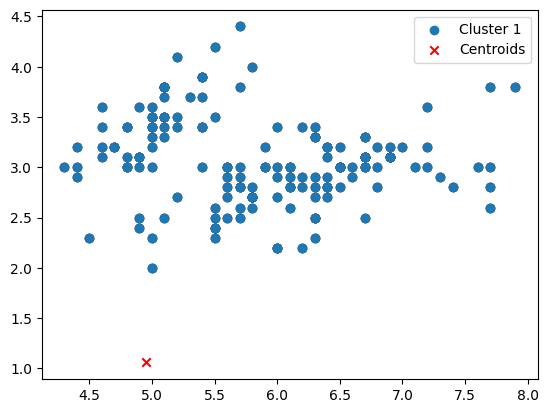

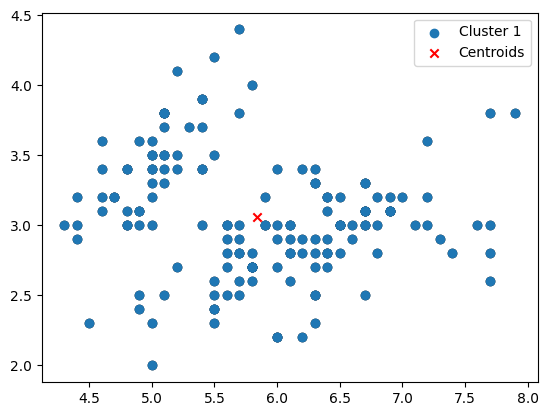

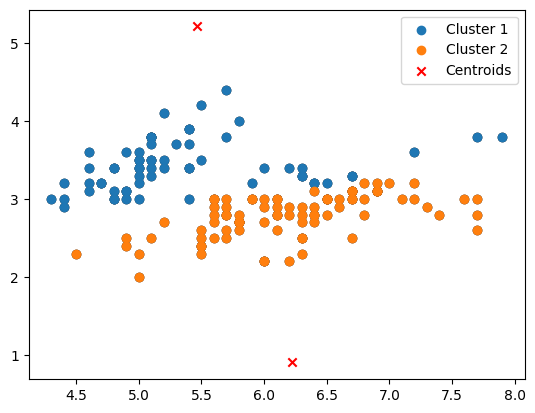

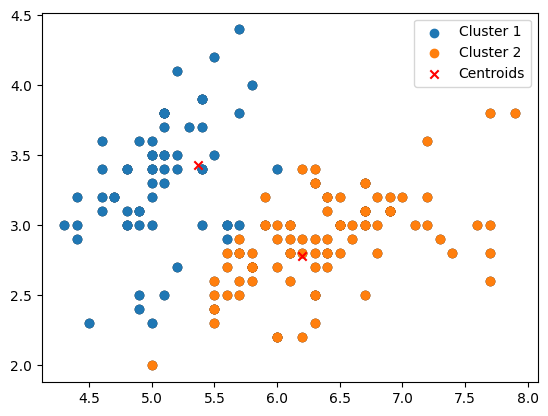

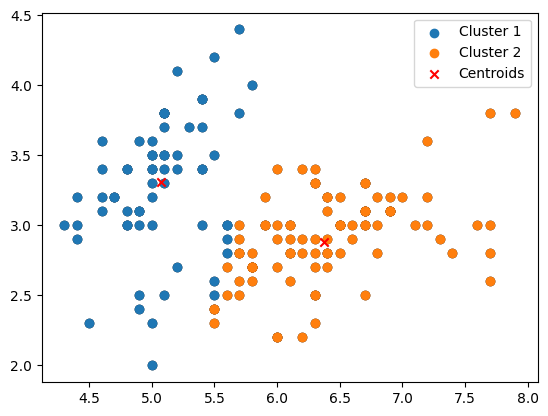

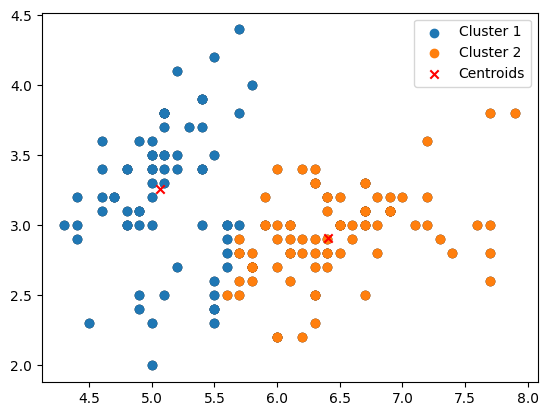

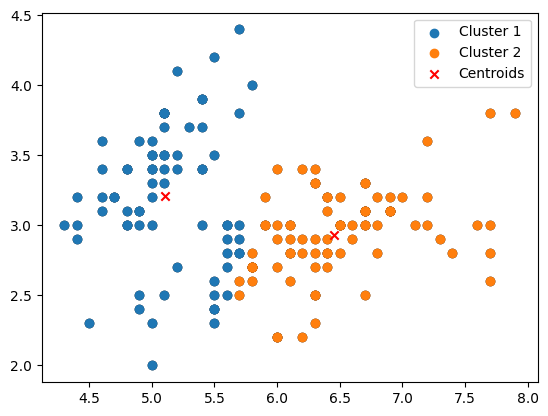

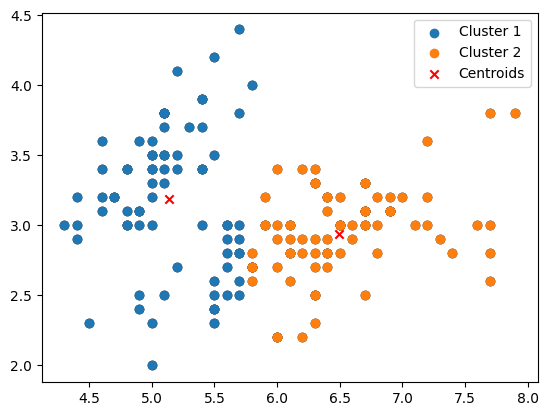

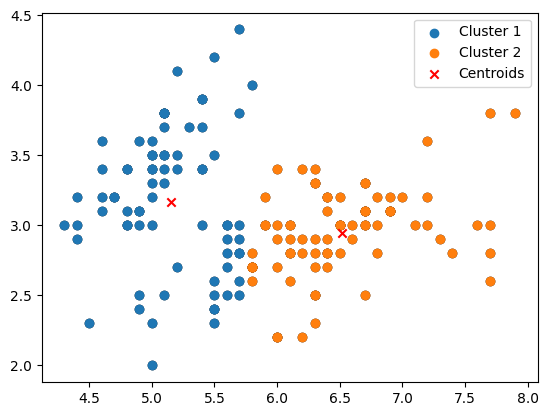

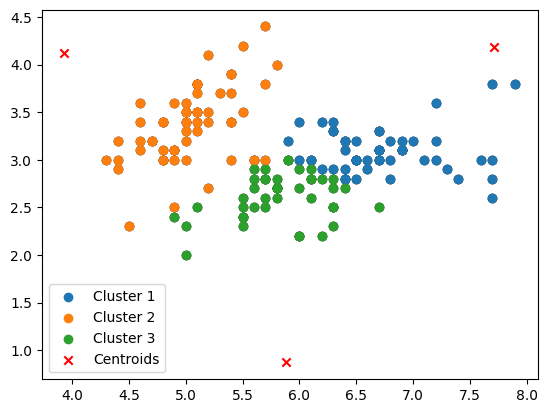

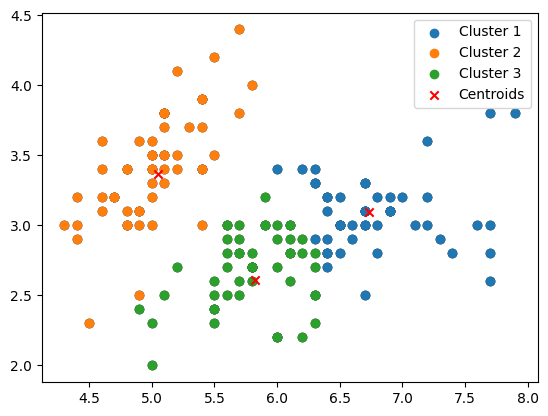

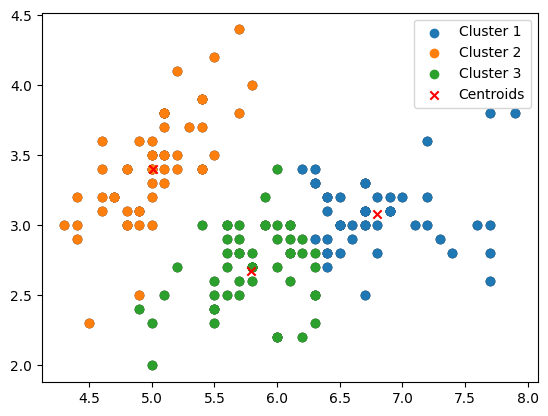

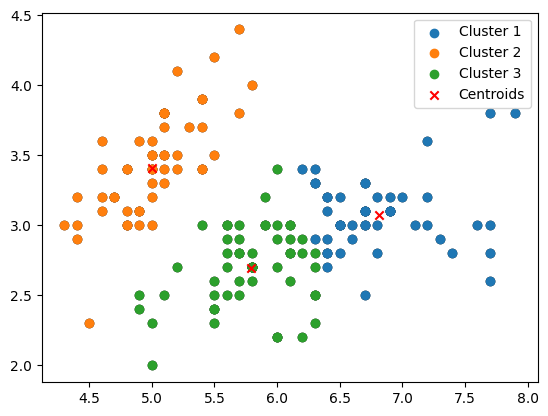

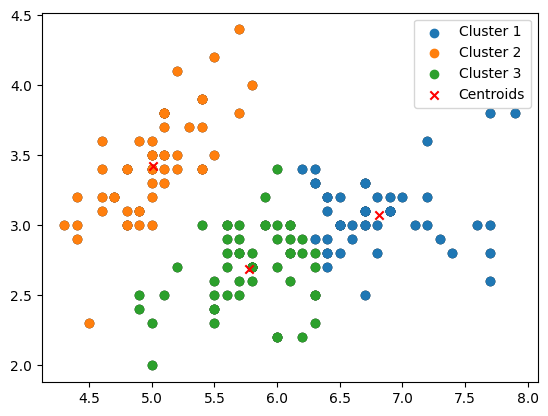

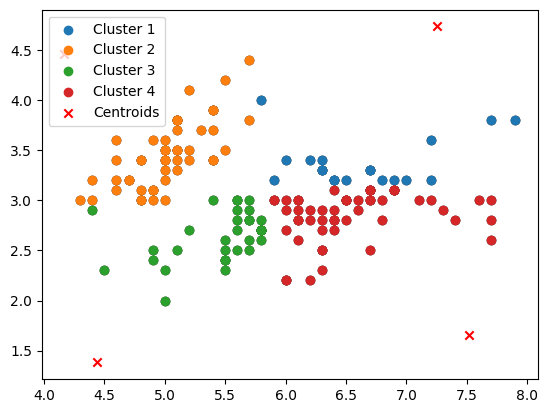

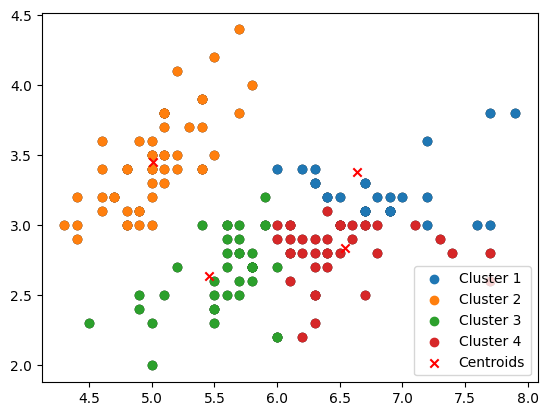

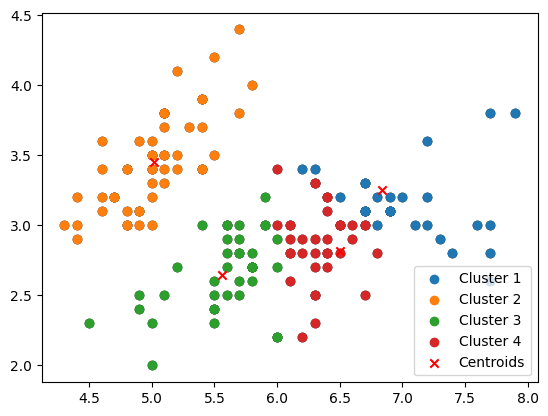

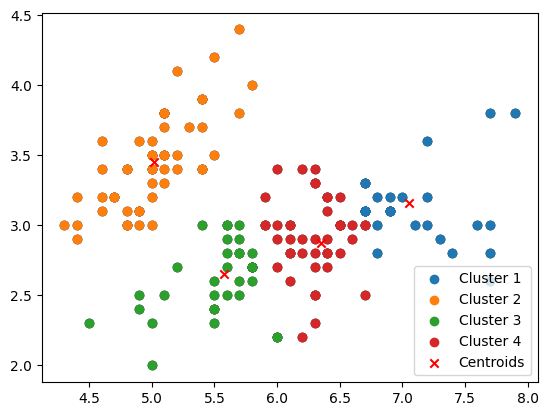

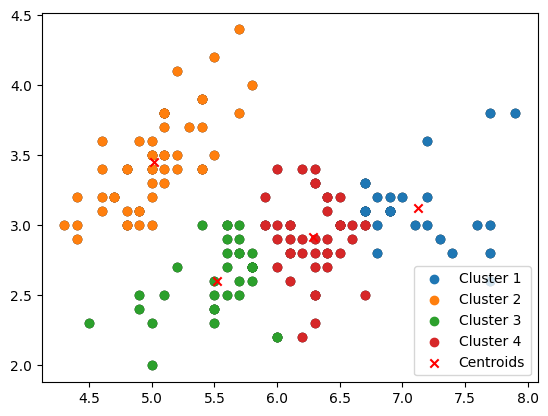

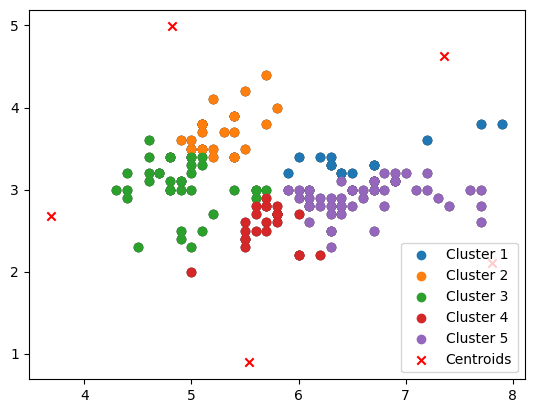

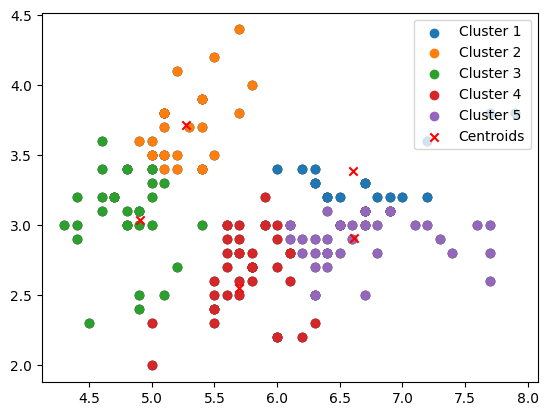

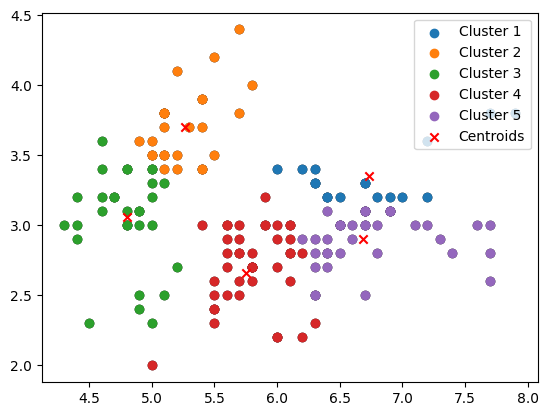

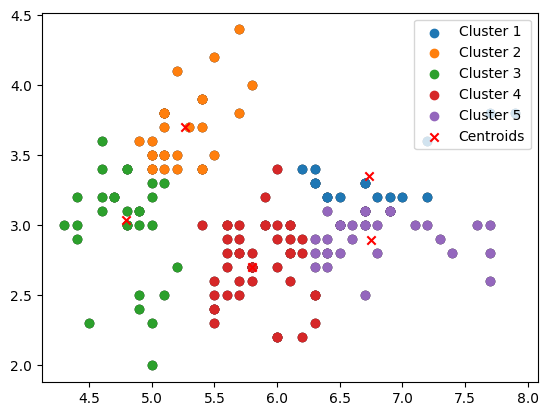

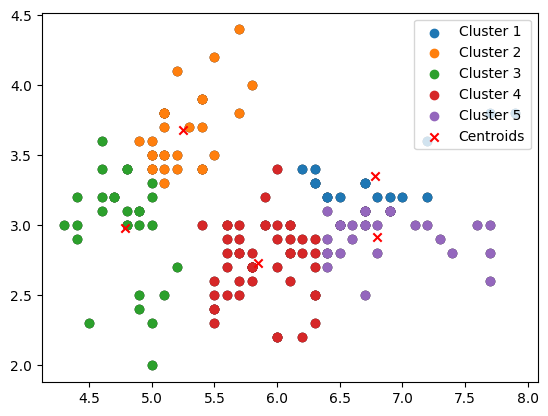

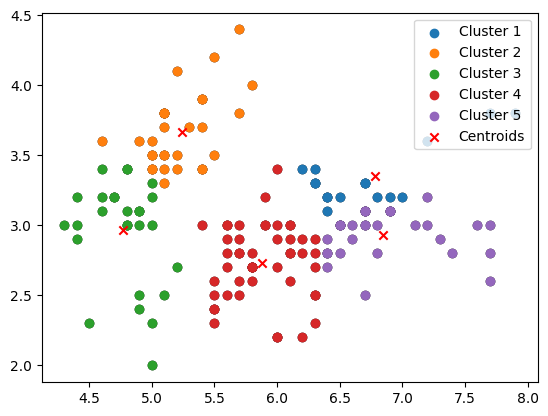

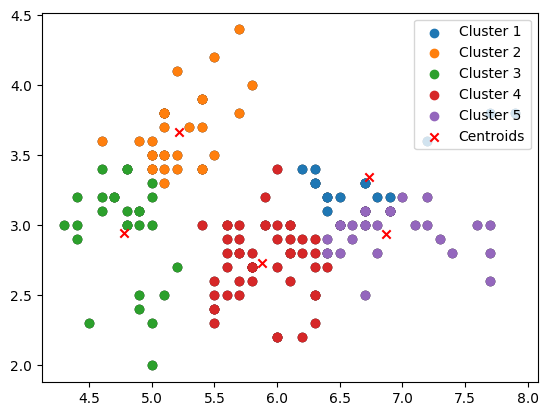

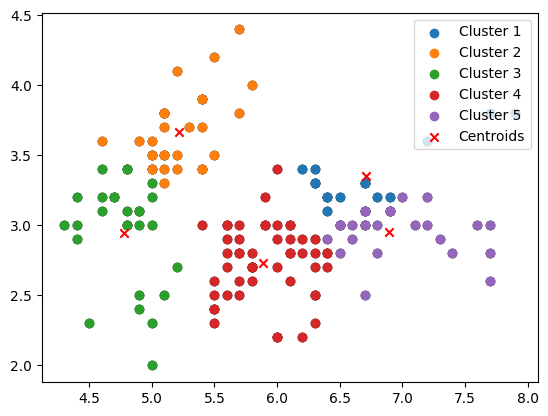

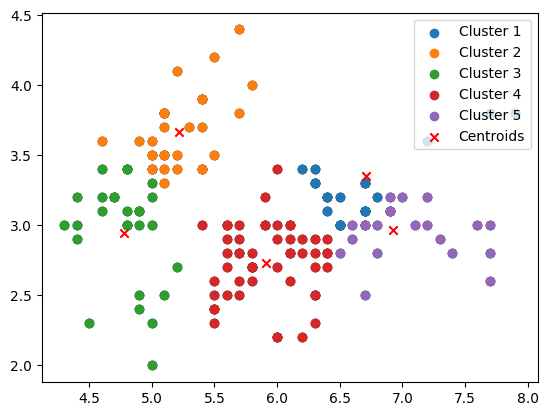

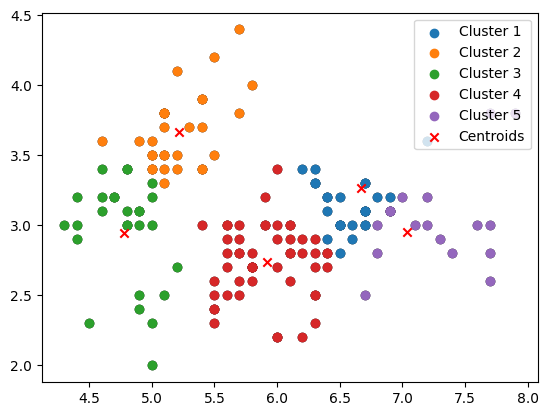

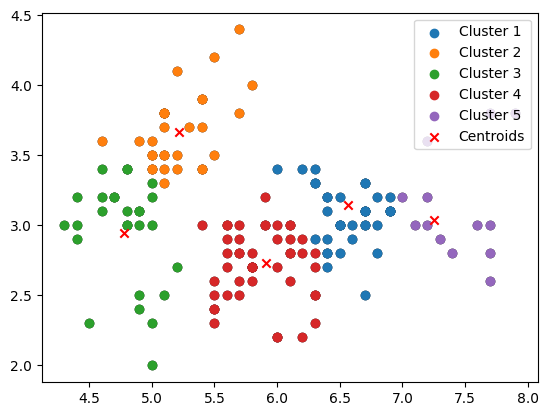

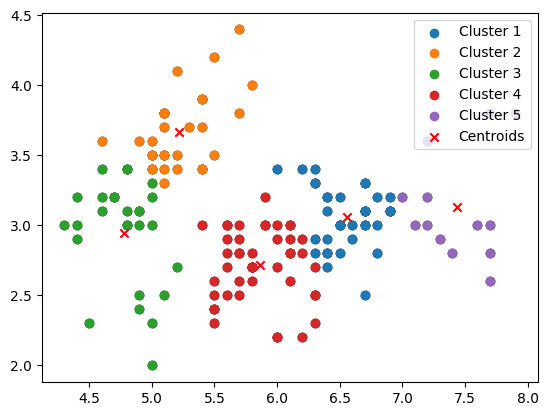

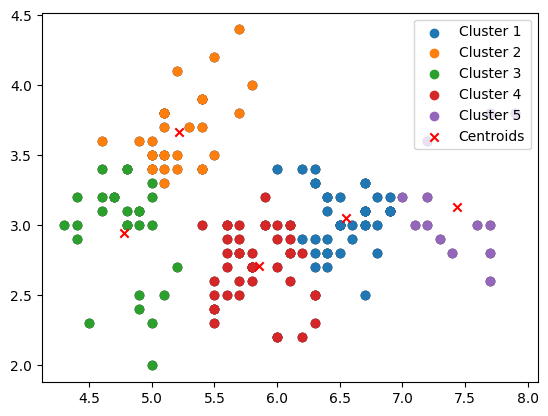

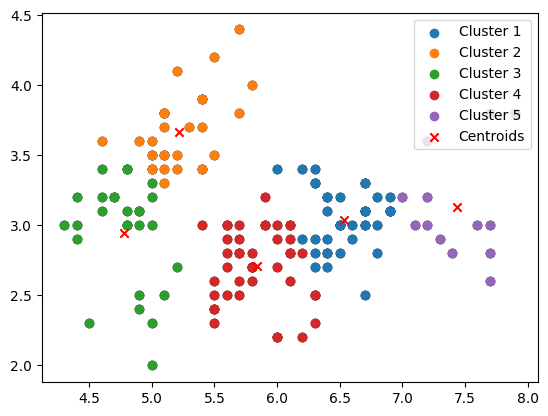

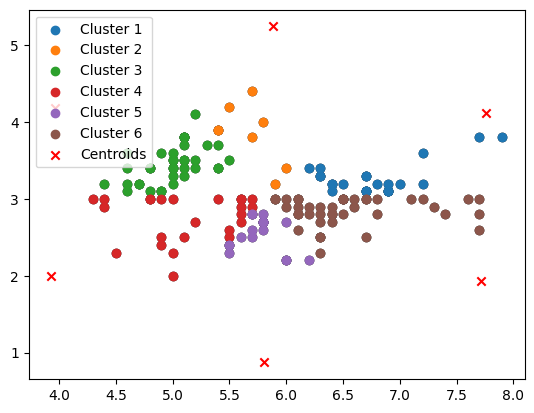

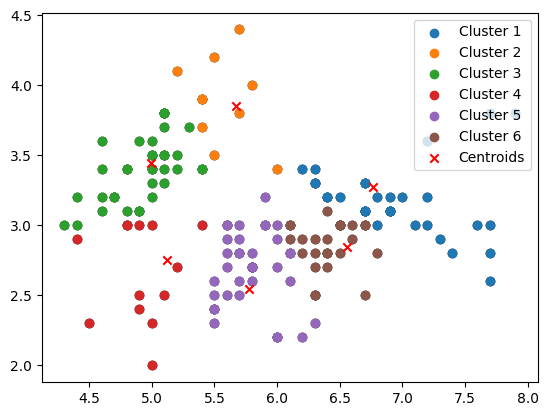

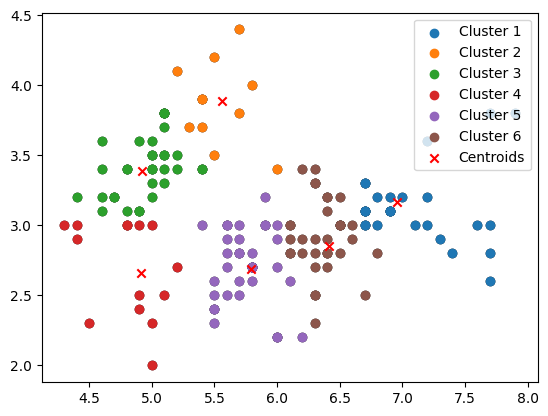

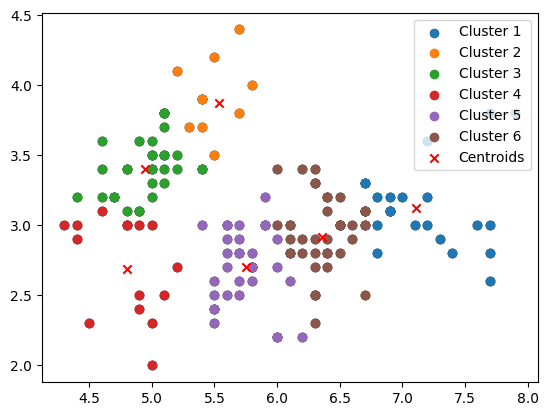

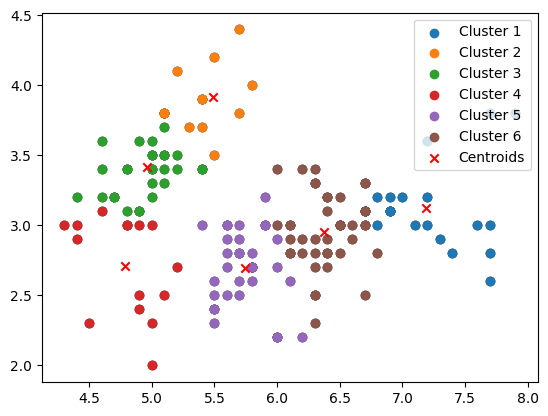

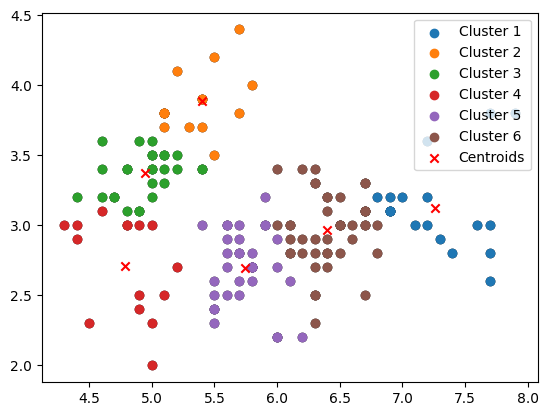

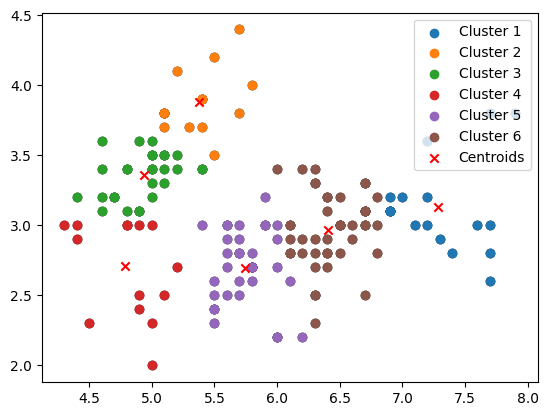

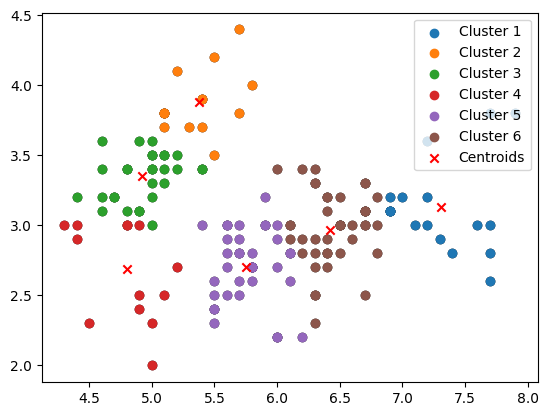

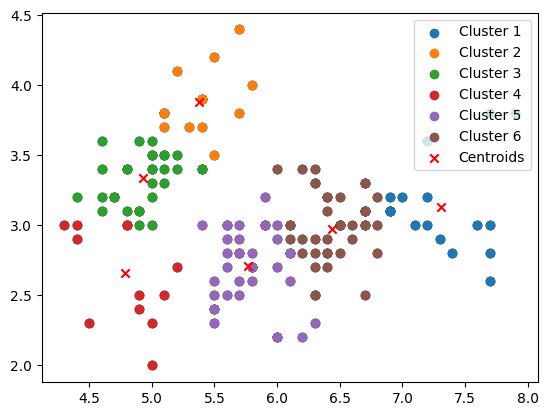

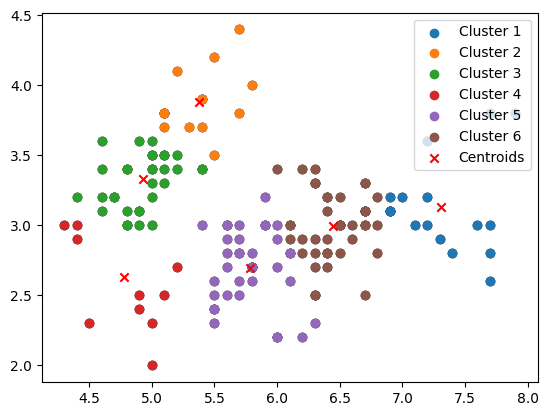

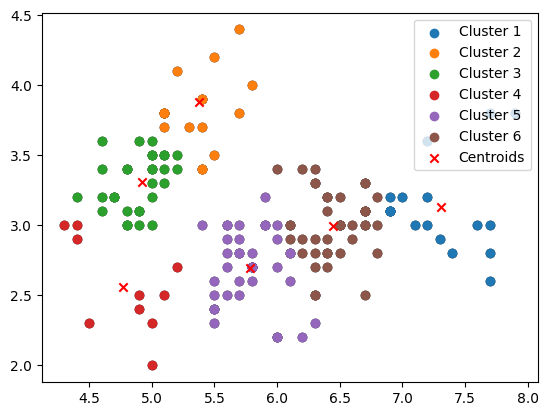

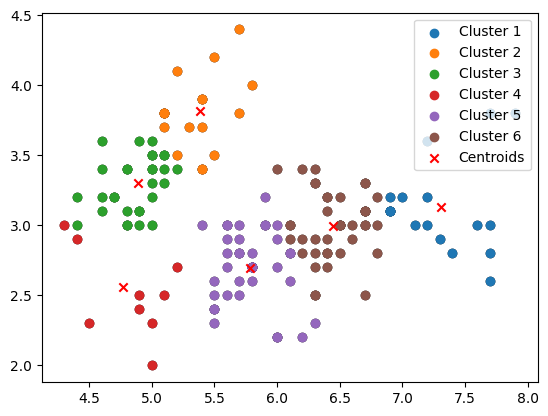

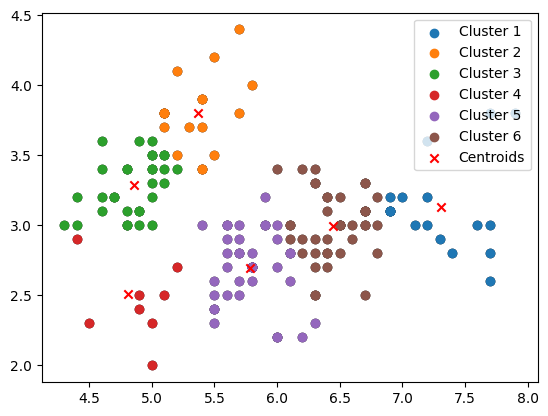

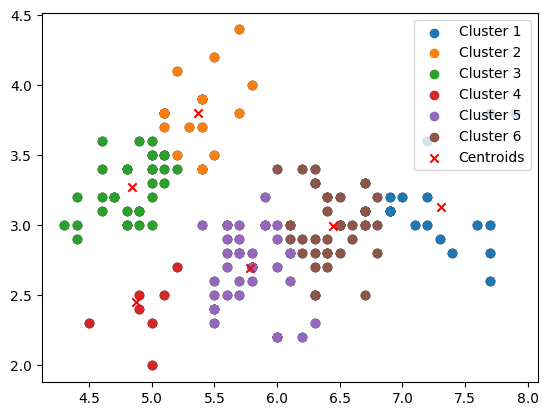

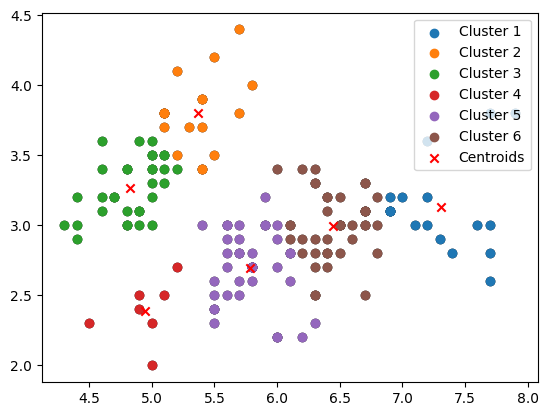

3

In [8]:
k = get_optimal_clusters_num(data, min_clusters=1, max_clusters=5)
k

In [9]:
k

3

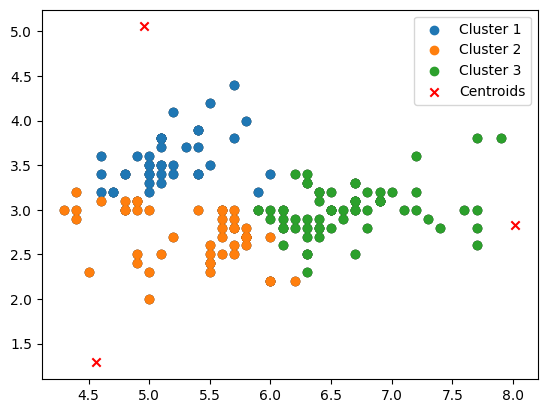

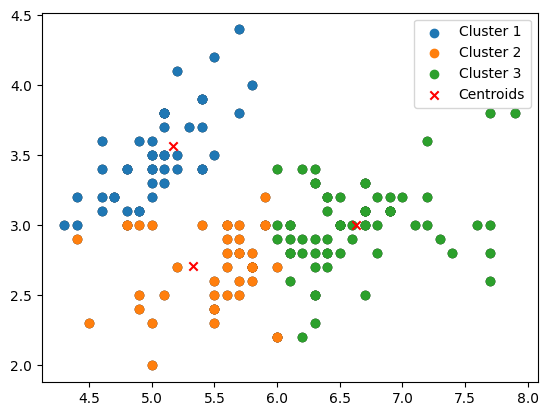

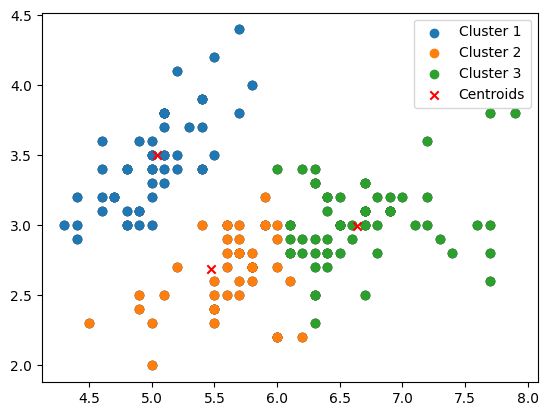

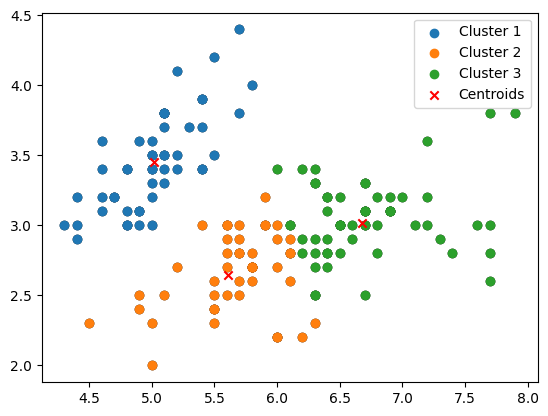

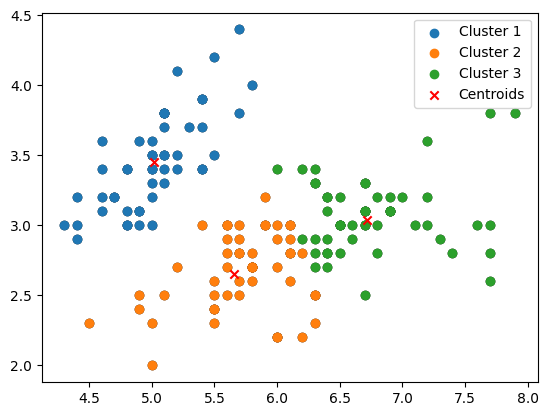

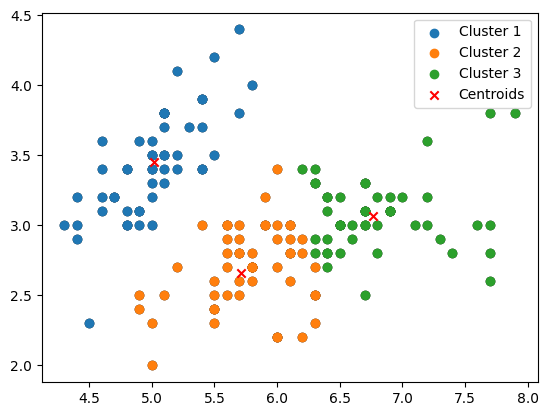

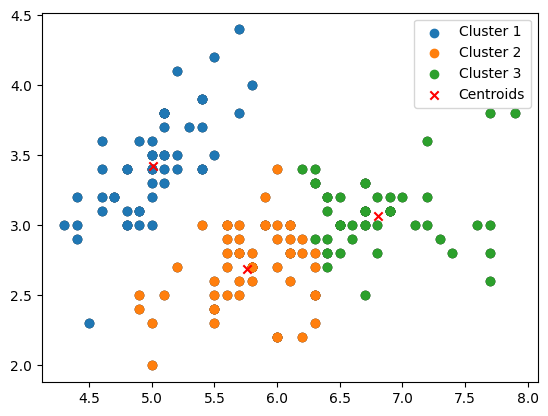

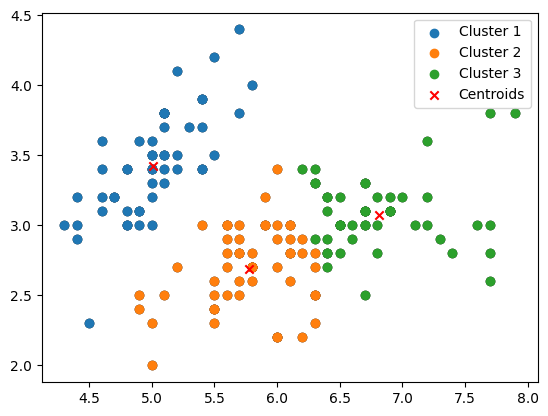

In [10]:
clusters, centroids = kmeans(data, k=k, max_iter=50)

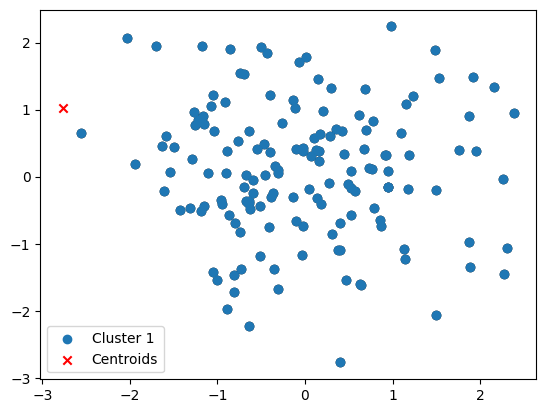

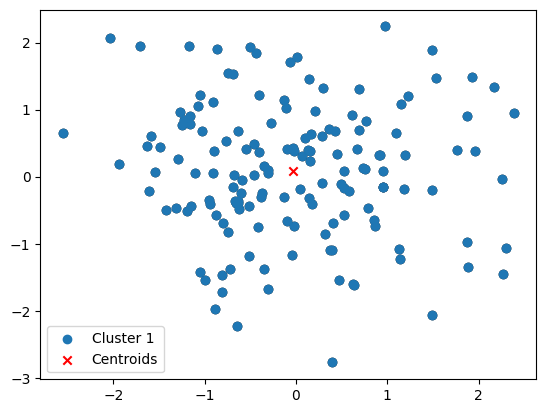

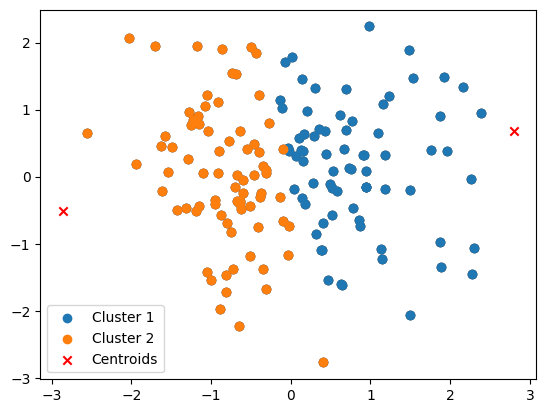

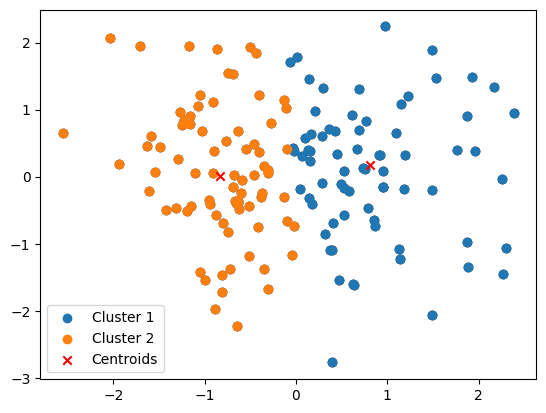

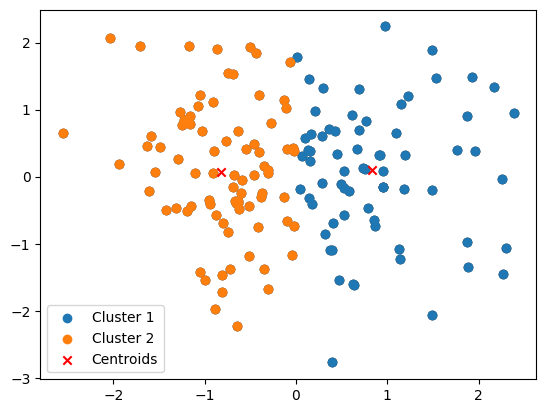

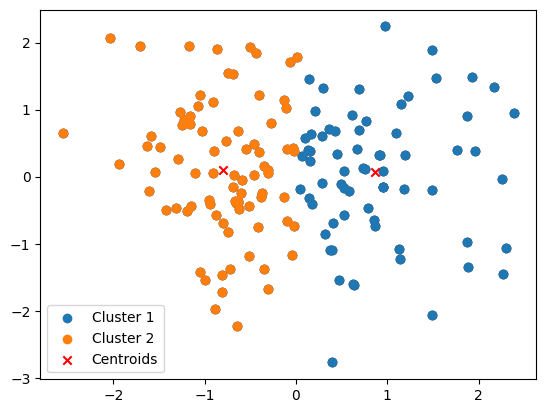

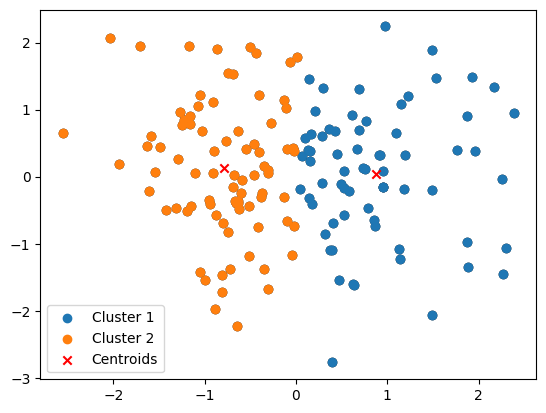

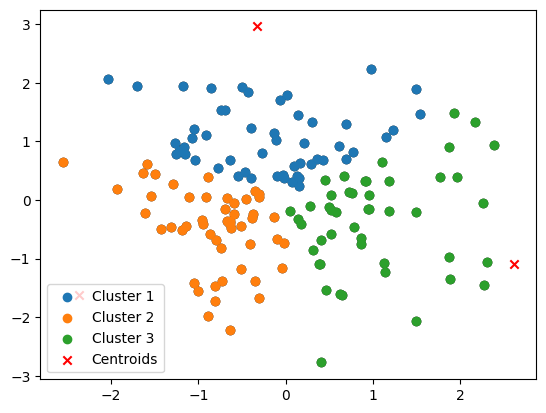

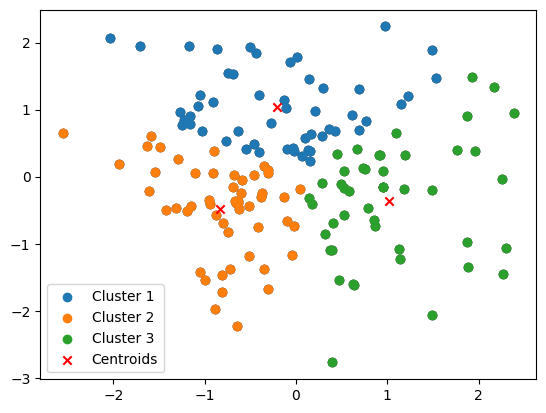

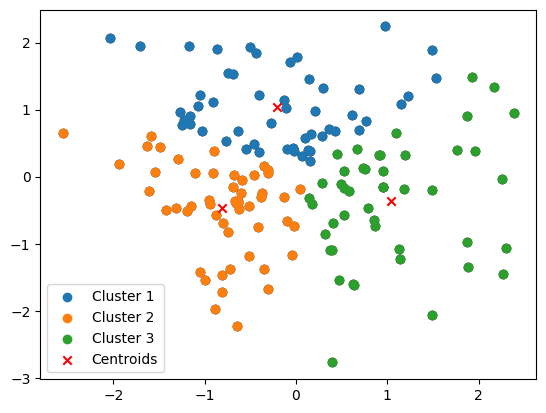

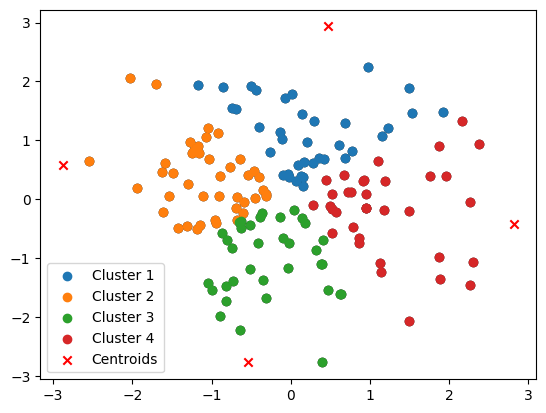

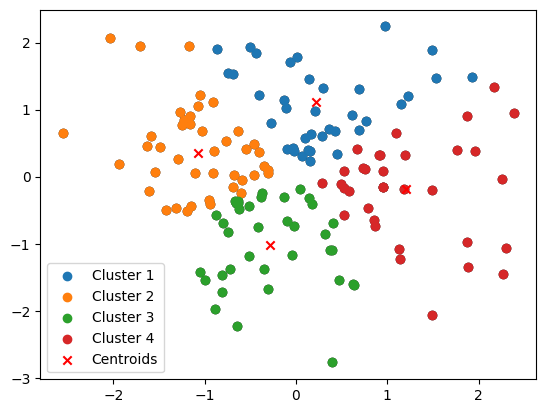

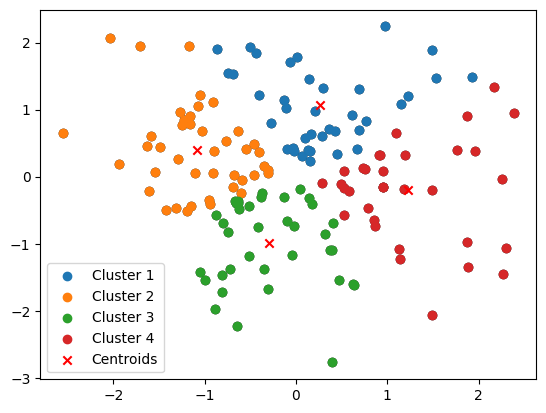

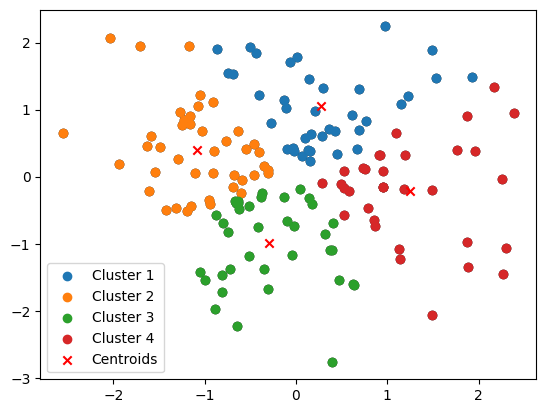

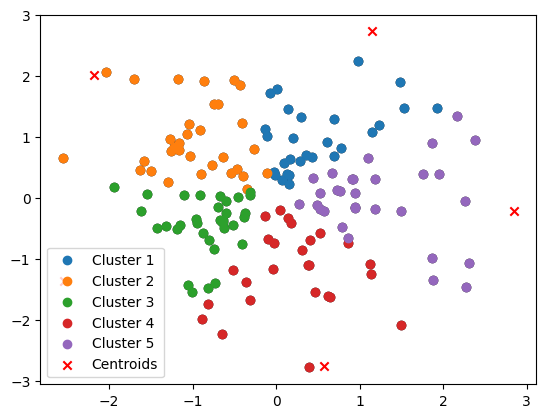

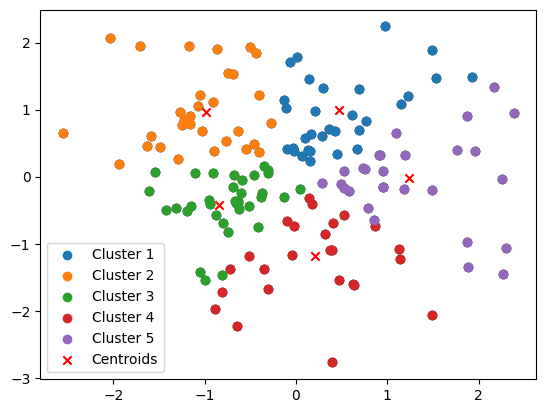

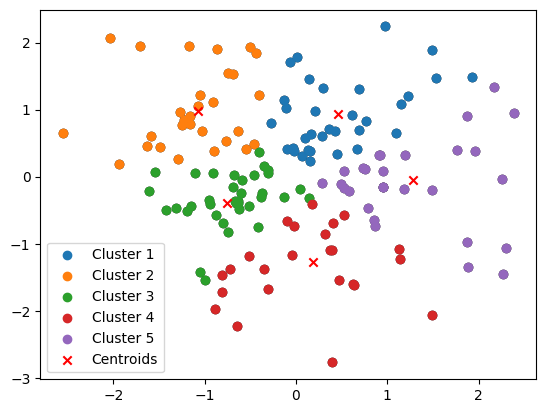

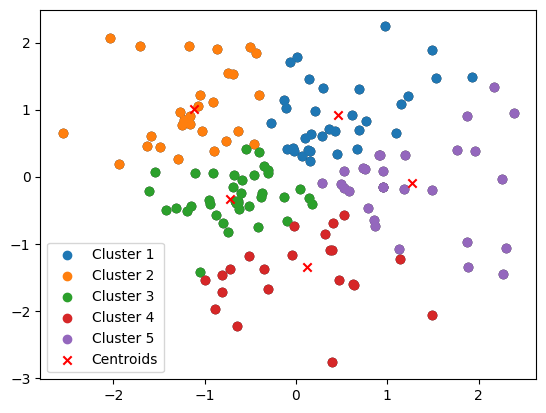

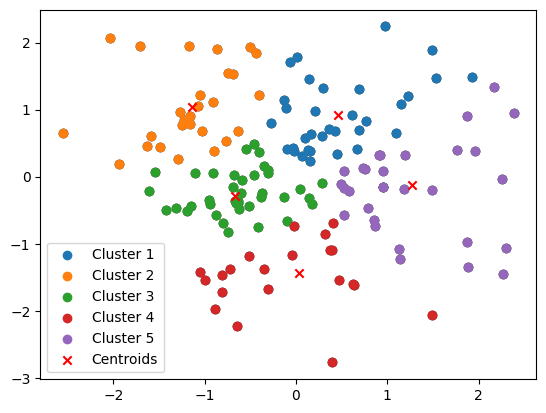

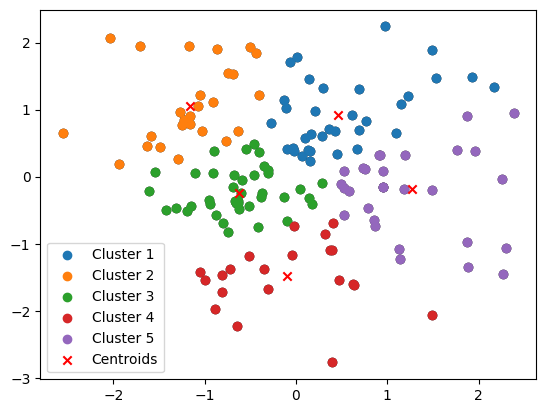

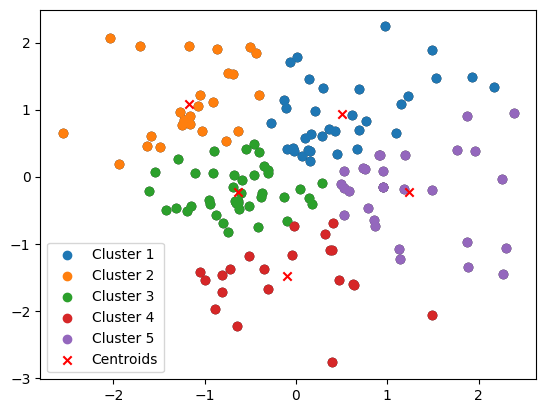

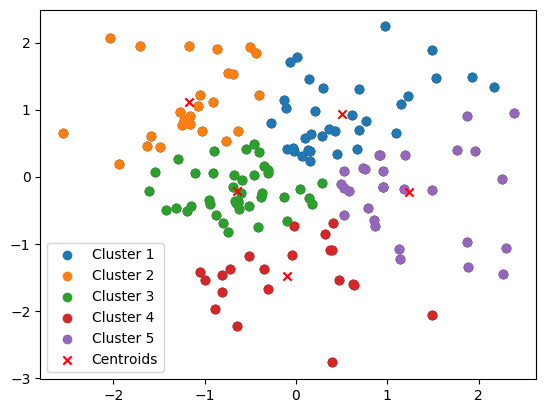

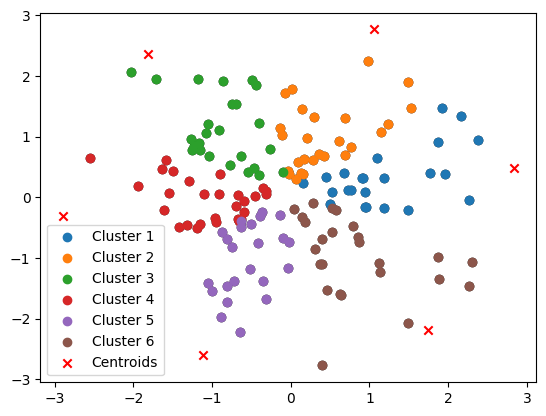

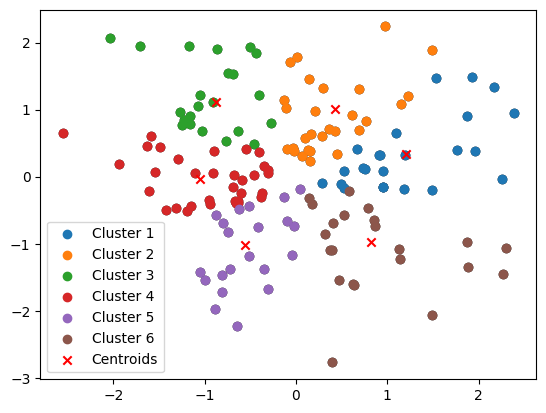

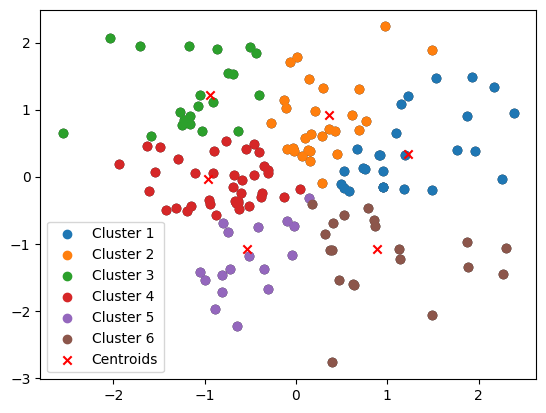

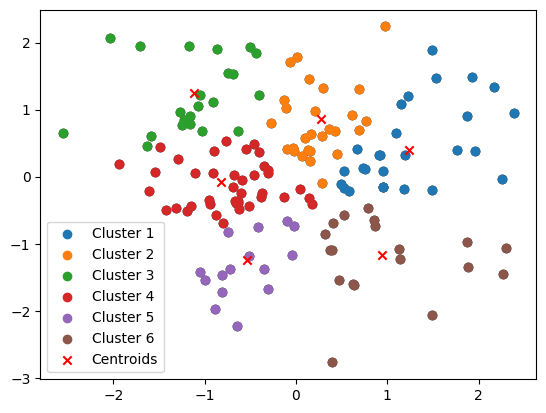

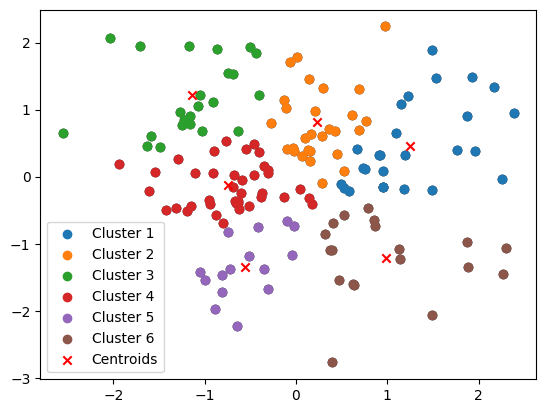

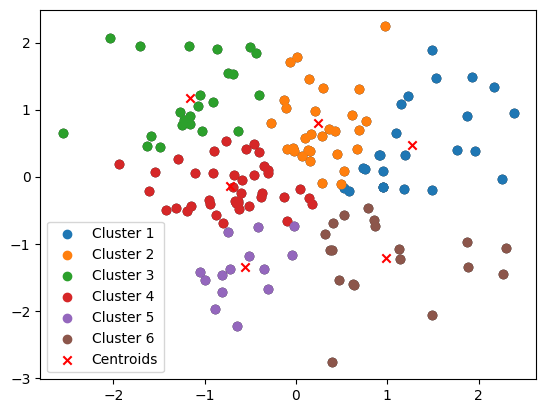

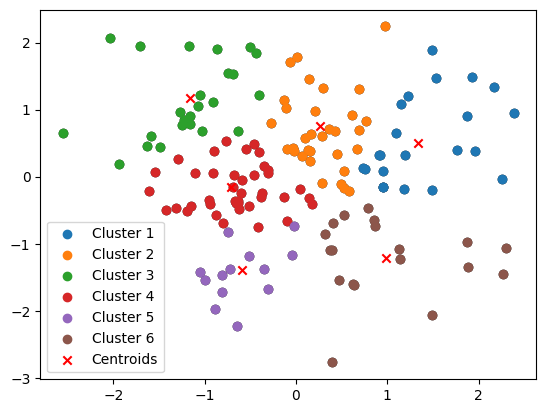

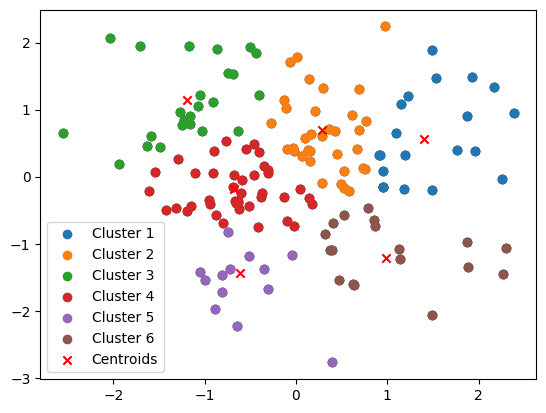

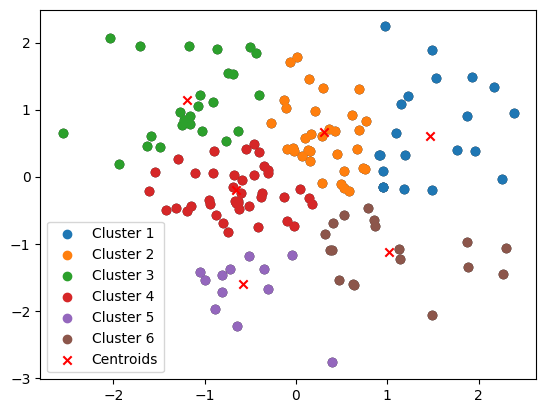

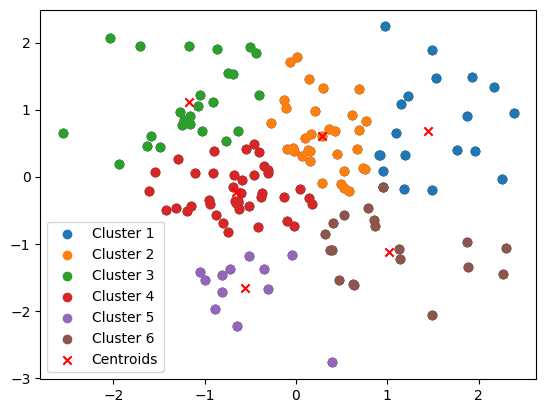

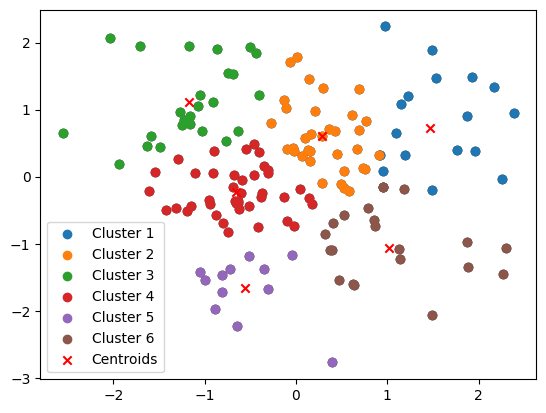

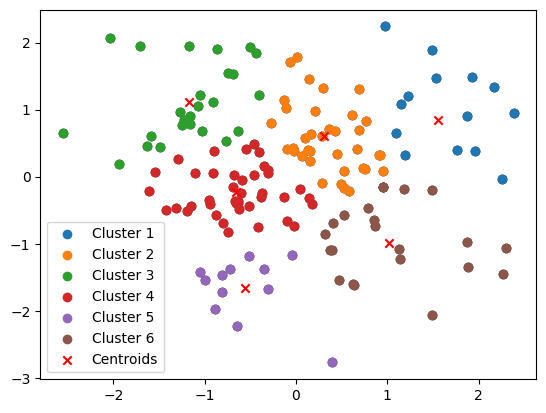

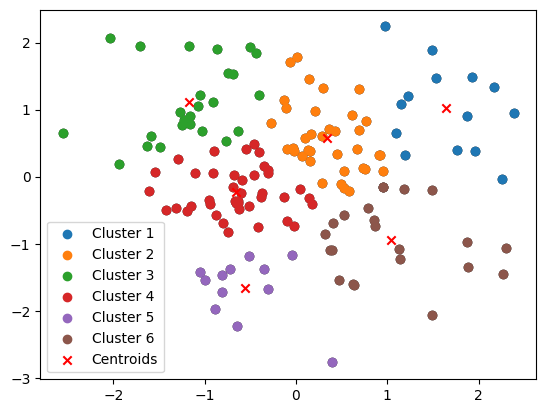

In [11]:
k = get_optimal_clusters_num(rand_points, min_clusters=1, max_clusters=5)

In [12]:
k

3

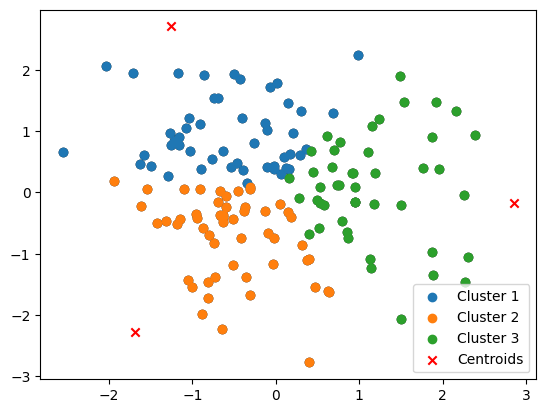

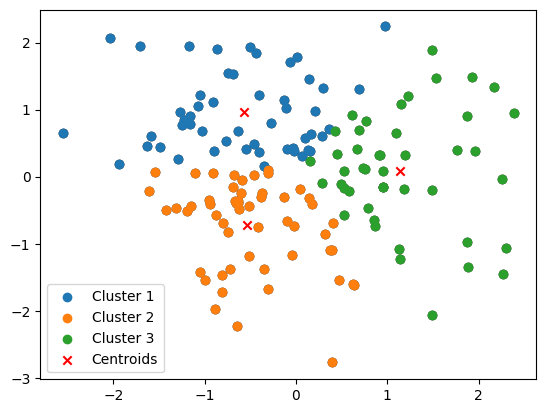

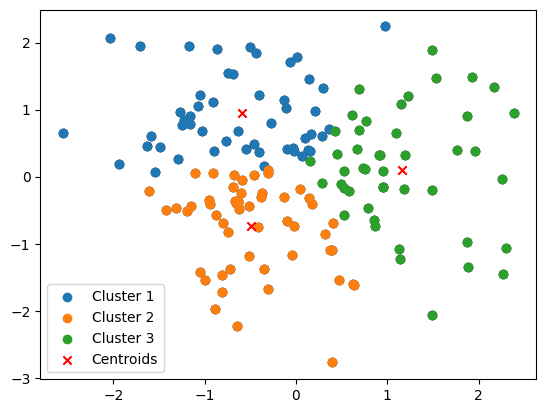

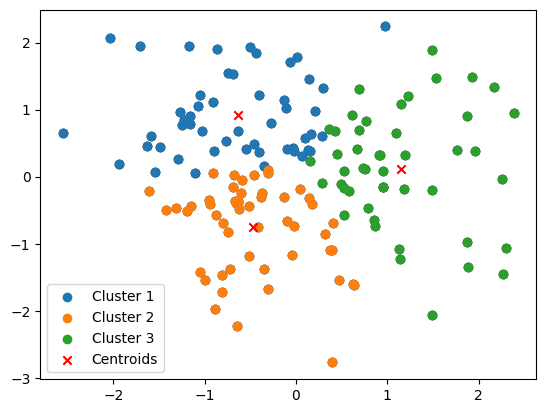

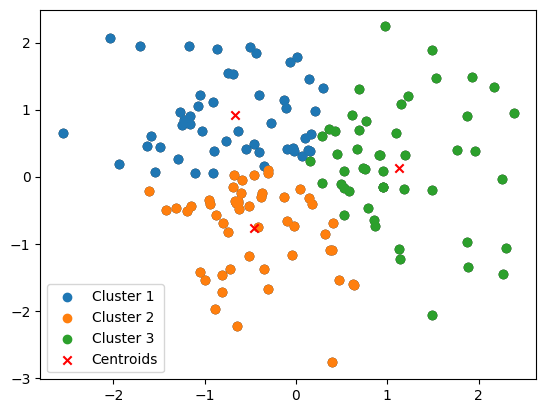

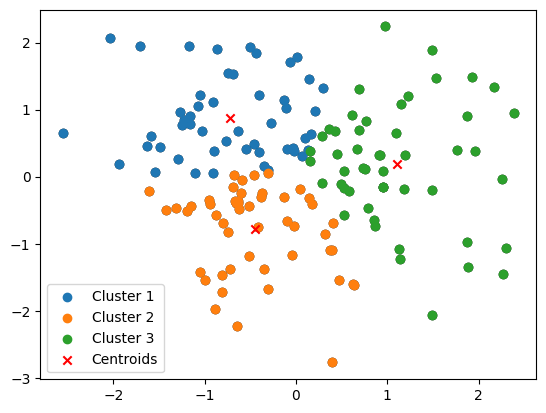

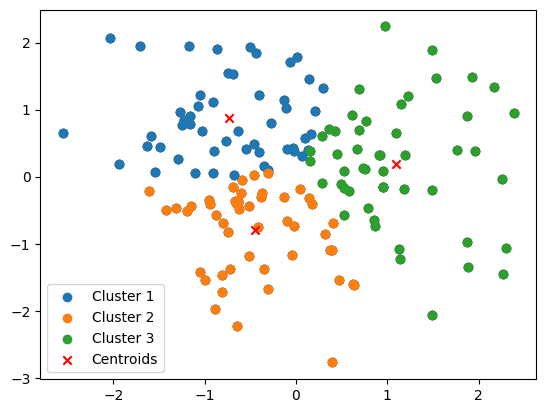

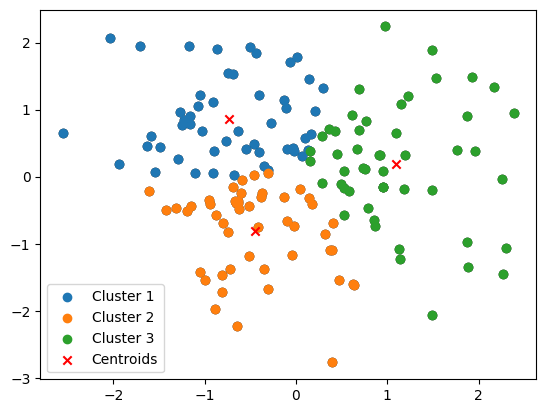

In [13]:
clusters, centroids = kmeans(rand_points, k=k, max_iter=50)